In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dados = pd.read_excel('setembro2021.xlsx')

In [38]:
print(dados.head())

              DATA  CONSUMO
0  01/09/2021 - 00      0.0
1  01/09/2021 - 01      0.0
2  01/09/2021 - 02      0.0
3  01/09/2021 - 03      0.0
4  01/09/2021 - 04      0.0


In [39]:
# Converter a coluna "DATA" para objeto de data e hora
#dados['DATA'] = pd.to_datetime(dados['DATA'])

dados['DATA'] = pd.to_datetime(dados['DATA'], format='%d/%m/%Y - %H')

# Definir a coluna "DATA" como o índice do DataFrame
dados.set_index('DATA', inplace=True)

# Plotar a série temporal do consumo de água


In [40]:
x = dados.index.tolist()

In [41]:
y = dados['CONSUMO'].tolist()

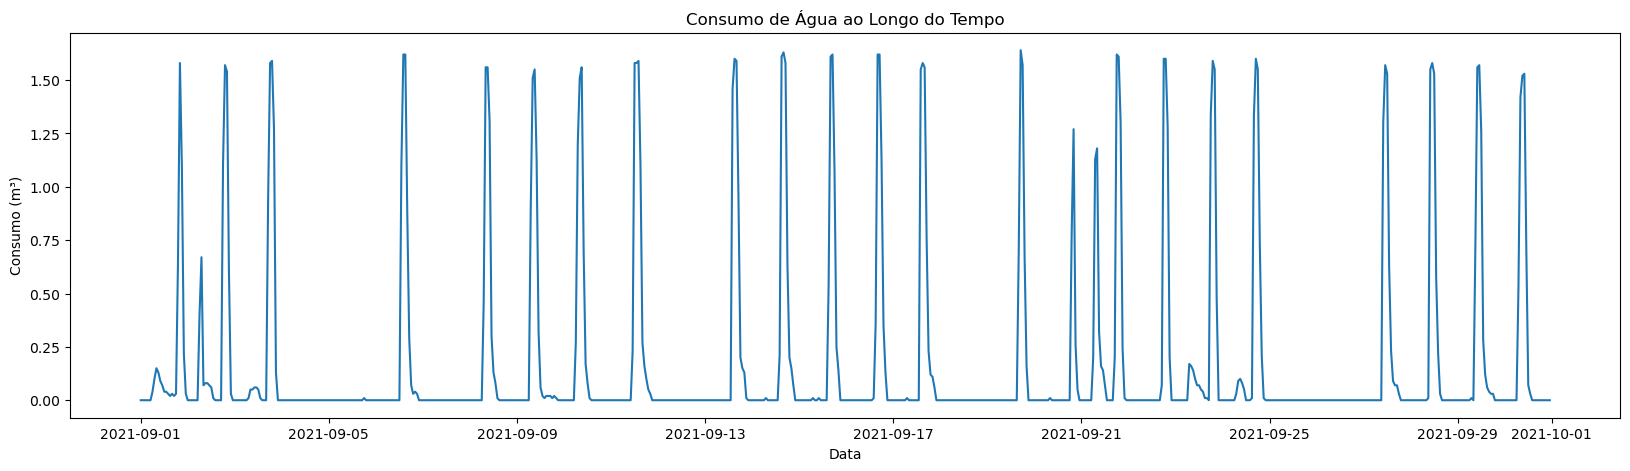

In [42]:
plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.xlabel('Data')
plt.ylabel('Consumo (m³)')
plt.title('Consumo de Água ao Longo do Tempo')
plt.show()

In [43]:
media = dados['CONSUMO'].mean()
print("Média:", media)
mediana = dados['CONSUMO'].median()
print("Mediana:", mediana)
desvio_padrao = dados['CONSUMO'].std()
print("Desvio Padrão:", desvio_padrao)
minimo = dados['CONSUMO'].min()
maximo = dados['CONSUMO'].max()
print("Mínimo:", minimo)
print("Máximo:", maximo)

Média: 0.1778888888888888
Mediana: 0.0
Desvio Padrão: 0.4403415527149877
Mínimo: 0.0
Máximo: 1.64000000000033


In [44]:
media = transformada.mean()
print("Média:", media)
#mediana = transformada.median()
#print("Mediana:", mediana)
desvio_padrao = transformada.std()
print("Desvio Padrão:", desvio_padrao)
minimo = frequencias.min()
maximo = frequencias.max()
print("Mínimo:", minimo)
print("Máximo:", maximo)

Média: (9.86864910777917e-17+6.167905692361981e-17j)
Desvio Padrão: 12.735721416551273
Mínimo: -0.5
Máximo: 0.4986111111111111


In [45]:
# Decompor a série temporal
decomposicao = seasonal_decompose(dados['CONSUMO'], model='additive')

# Obter os componentes separados
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

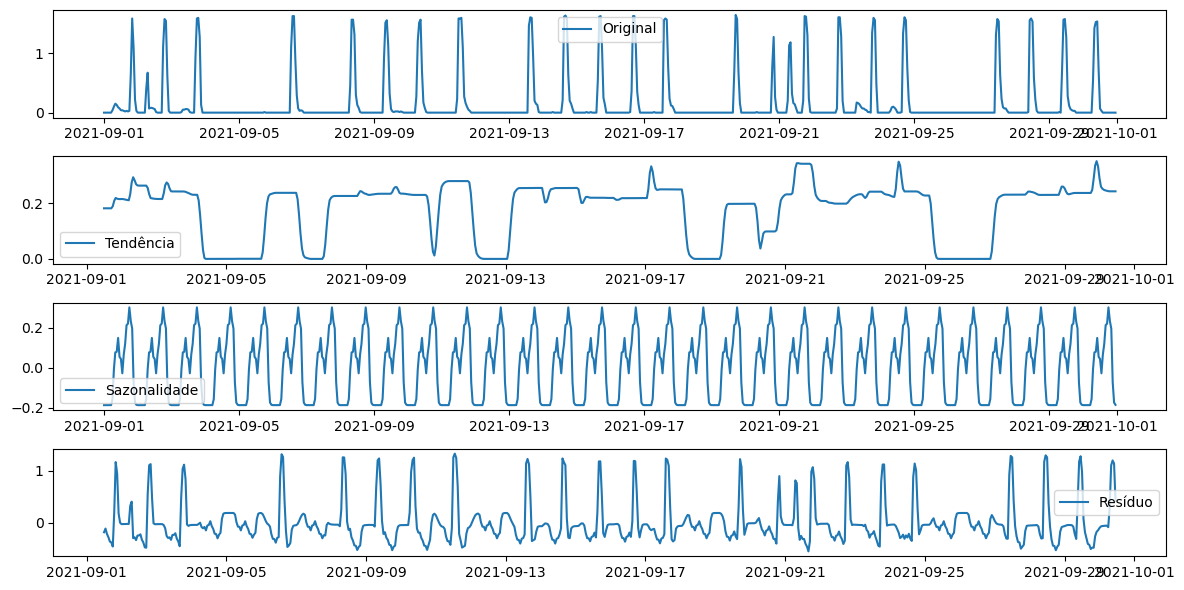

In [46]:
# Plotar os componentes
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(dados['CONSUMO'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Resíduo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

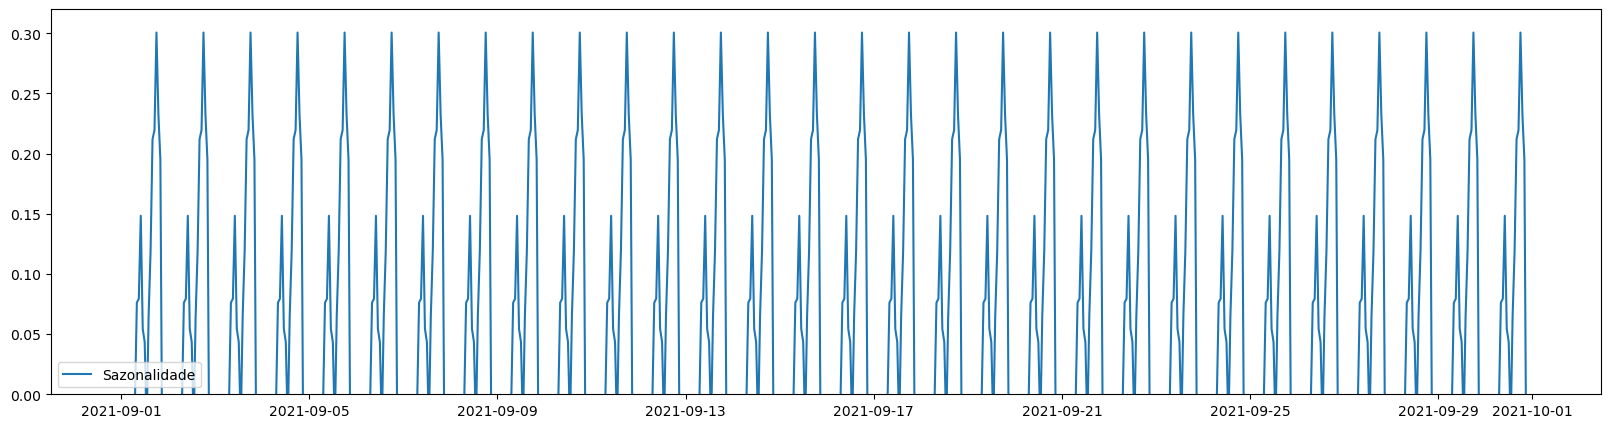

In [47]:
plt.figure(figsize=(20, 5))
plt.ylim(0,0.32)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')

In [48]:
transformada = np.fft.fft(y)
amplitudes = np.abs(transformada)
# Crie um array de frequências correspondentes às amplitudes
frequencias = np.fft.fftfreq(len(y))


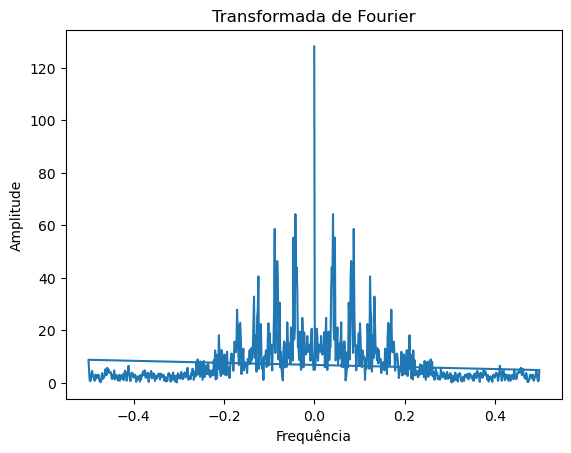

In [49]:
# Plote o gráfico de amplitudes em função das frequências
plt.plot(frequencias, amplitudes)
plt.xlabel('Frequência')
#plt.xlim(0,0.5)
#plt.ylim(0,70)
plt.ylabel('Amplitude')
plt.title('Transformada de Fourier')
plt.show()

In [50]:
# Defina um limite mínimo de amplitude para considerar como pico
limite_amplitude = 15  # Ajuste o valor conforme necessário

# Encontre os índices onde as amplitudes são maiores que o limite mínimo
indices_picos = np.where(amplitudes > limite_amplitude)[0]

# Filtrar apenas os valores positivos de frequência
indices_positivos = np.where(frequencias >= 0)[0]
indices_picos_positivos = np.intersect1d(indices_picos, indices_positivos)

# Obtenha as amplitudes e frequências correspondentes aos picos
picos_amplitudes = amplitudes[indices_picos_positivos]
picos_frequencias = frequencias[indices_picos_positivos]

# Ordene os picos em ordem decrescente de amplitude
indices_ordenados = np.argsort(picos_amplitudes)[::-1]
picos_amplitudes = picos_amplitudes[indices_ordenados]
picos_frequencias = picos_frequencias[indices_ordenados]

# Imprima os picos encontrados
for amplitude, frequencia in zip(picos_amplitudes, picos_frequencias):
    print("Amplitude:", amplitude)
    print("Frequência:", frequencia)
    print()

Amplitude: 128.07999999999996
Frequência: 0.0

Amplitude: 64.19137684788257
Frequência: 0.04166666666666667

Amplitude: 58.54341473793663
Frequência: 0.08750000000000001

Amplitude: 55.24350728976368
Frequência: 0.04583333333333334

Amplitude: 46.33356029521633
Frequência: 0.08194444444444444

Amplitude: 43.981668285193926
Frequência: 0.03888888888888889

Amplitude: 40.45570120334938
Frequência: 0.12361111111111112

Amplitude: 40.08804605549324
Frequência: 0.08055555555555556

Amplitude: 37.56308691308344
Frequência: 0.04027777777777778

Amplitude: 36.01593944735304
Frequência: 0.0375

Amplitude: 33.425484720758256
Frequência: 0.08333333333333334

Amplitude: 32.76988381399827
Frequência: 0.13333333333333333

Amplitude: 30.470558573973175
Frequência: 0.0763888888888889

Amplitude: 28.294278316664247
Frequência: 0.08888888888888889

Amplitude: 27.784386505793176
Frequência: 0.17083333333333334

Amplitude: 27.767506810208808
Frequência: 0.125

Amplitude: 25.08104370061661
Frequência: 0.12

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

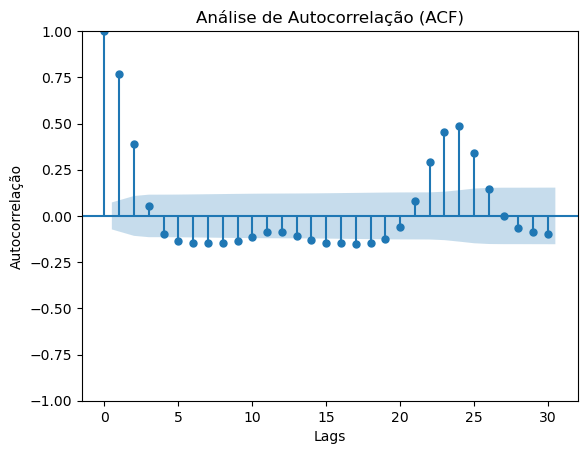

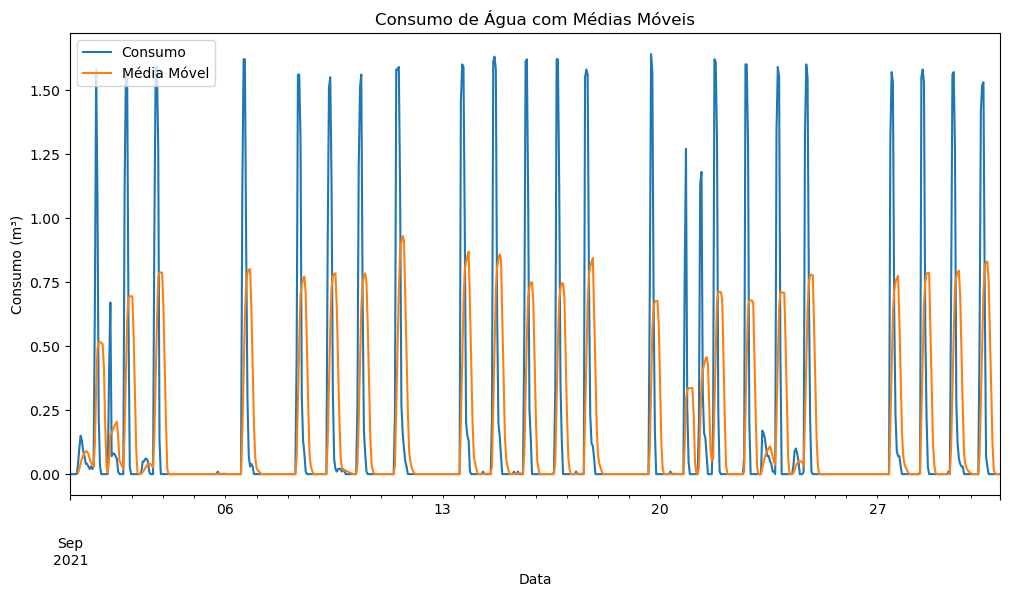

In [55]:
# Análise de Autocorrelação (ACF)
plot_acf(dados['CONSUMO'], lags=30)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Análise de Autocorrelação (ACF)')
plt.show()

# Análise de Médias Móveis
dados['Média Móvel'] = dados['CONSUMO'].rolling(window=7).mean()
dados.plot(y=['CONSUMO', 'Média Móvel'], figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Consumo (m³)')
plt.title('Consumo de Água com Médias Móveis')
plt.legend(['Consumo', 'Média Móvel'])
plt.show()